# 🧠 MNIST Digit Classification — Logistic Regression (NumPy)

A simple machine learning project that implements **logistic regression from scratch** using **NumPy** to classify handwritten digits (0–9) from the **MNIST dataset**.

---

## 📌 Project Overview

This project demonstrates:
- Manual implementation of multi-class logistic regression
- Using **softmax activation** and **cross-entropy loss**
- Training with **mini-batch gradient descent**
- Evaluating performance on real-world digit data

---

## 🗂 Dataset

**MNIST** is a benchmark dataset of handwritten digits:
- 60,000 training images
- 10,000 test images
- Each image: 28×28 pixels (flattened to 784 features)

We fetch it via `sklearn.datasets.fetch_openml`.

---


## 🔧 Features

- 💾 Load and preprocess real MNIST data
- 🧮 Manual implementation of softmax, loss, and gradient descent
- 🔁 Training loop with mini-batch updates
- 📈 Visualization of training loss
- ✅ Model accuracy evaluation
- 🖼 Sample digit predictions display

---

# **Pipeline**
*   Load MNIST (28×28 grayscale images)

*   Flatten each image to a 784-dimensional vector

*   Implement:

        *     Softmax function
        *     Cross-entropy loss
        *     Gradient descent



*   Train the model on X_train
*   Predict on X_test and compute accuracy

# **Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# **Load and Prepare Data**

In [3]:
# Load MNIST (70000 samples)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data  # shape: (70000, 784)
y = mnist.target.astype(int)  # string → int

# Normalize
X = X / 255.0

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))  # shape: (70000, 10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# **Softmax**

In [4]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# **Cross-Entropy Loss**

In [5]:
def compute_loss(y_true, y_pred):
    eps = 1e-9
    return -np.mean(np.sum(y_true * np.log(y_pred + eps), axis=1))

# **Initialize Weights**

In [6]:
def initialize_weights(n_features, n_classes):
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))
    return W, b

# **Train Using Gradient Descent**

In [8]:
def train(X, y, lr=0.1, epochs=1000, batch_size=64):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]
    W, b = initialize_weights(n_features, n_classes)
    losses = []

    for epoch in range(epochs):
        # Mini-batch training
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            logits = np.dot(X_batch, W) + b
            y_pred = softmax(logits)

            loss = compute_loss(y_batch, y_pred)

            # Gradients
            error = y_pred - y_batch
            dW = np.dot(X_batch.T, error) / batch_size
            db = np.sum(error, axis=0, keepdims=True) / batch_size

            # Update
            W -= lr * dW
            b -= lr * db

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
            losses.append(loss)

    return W, b, losses

# **Predict and Evaluate**

In [9]:
def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

# Train
W, b, losses = train(X_train, y_train, lr=0.1, epochs=100)

# Predict
y_pred_test = predict(X_test, W, b)
y_true_test = np.argmax(y_test, axis=1)

# Accuracy
acc = np.mean(y_pred_test == y_true_test)
print(f"Test Accuracy: {acc * 100:.2f}%")

Epoch 0, Loss: 0.2797
Epoch 10, Loss: 0.2409
Epoch 20, Loss: 0.4032
Epoch 30, Loss: 0.3375
Epoch 40, Loss: 0.1931
Epoch 50, Loss: 0.3632
Epoch 60, Loss: 0.2338
Epoch 70, Loss: 0.3402
Epoch 80, Loss: 0.1550
Epoch 90, Loss: 0.1863
Test Accuracy: 92.17%


# **Visualize Loss Curve**

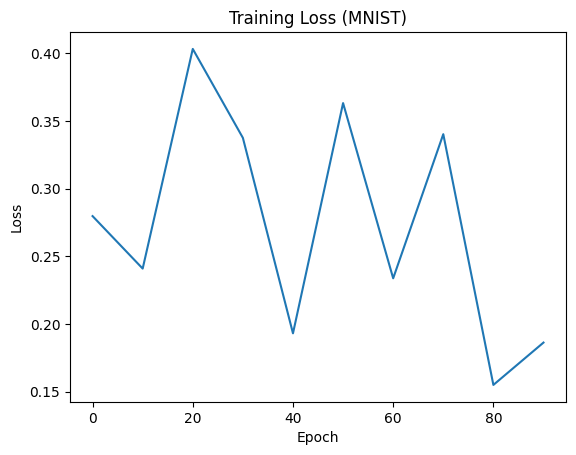

In [11]:
plt.plot(range(0, 100, 10), losses)
plt.title("Training Loss (MNIST)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# **Show Predictions**

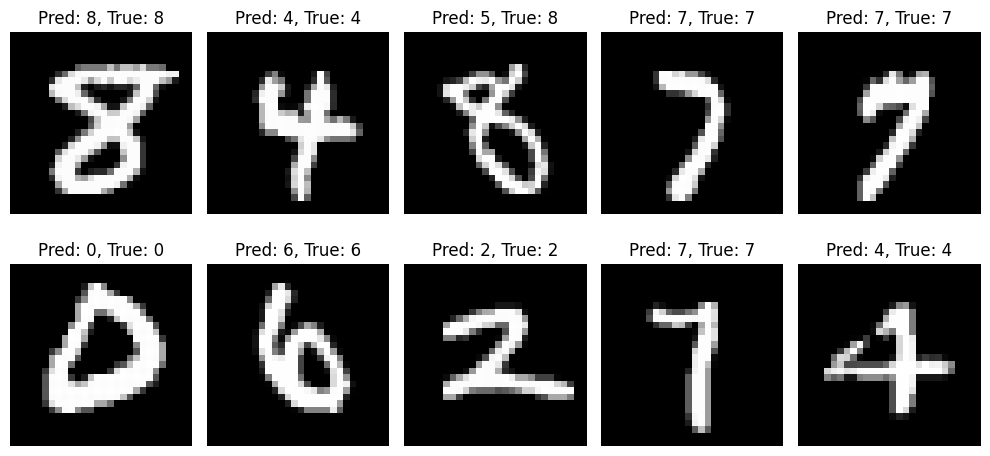

In [10]:
# Visualize some test predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    img = X_test[i].reshape(28, 28)
    pred = y_pred_test[i]
    true = y_true_test[i]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {pred}, True: {true}")
    ax.axis('off')
plt.tight_layout()
plt.show()